## Load and explore data

Importing libraries

In [197]:
# Importing pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing seaborn 
import seaborn as sns

#plotting style
sns.set_style("whitegrid")

Load the data

Loading the seattle dataset

In [198]:
df_seattle = pd.read_csv("../data/seattle_rain .csv")

In [199]:
type(df_seattle)

pandas.core.frame.DataFrame

Loading St louis dataset

In [200]:
df_stlouis = pd.read_csv("../data/stl_rain .csv")

Getting first 5 rows using head

In [201]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [202]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [203]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [204]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [205]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [206]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [207]:
df_seattle.shape            # Shape gives number of rows and columns

(1658, 10)

In [208]:
df_stlouis.shape

(54574, 8)

In [209]:
df_stlouis['STATION'].unique() 

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [210]:
df_stlouis['STATION'].nunique()

44

In [211]:
df_seattle['STATION'].nunique()

1

In [212]:
df_stlouis['DATE']

0        2017-01-01
1        2017-01-03
2        2017-01-04
3        2017-01-05
4        2017-01-06
            ...    
54569    2022-12-08
54570    2022-12-13
54571    2022-12-14
54572    2022-12-15
54573    2022-12-16
Name: DATE, Length: 54574, dtype: object

In [213]:
df_seattle['DATE'].max()

'9/9/22'

Getting last 5 rows using "tail" to know the maximum date 

In [214]:
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [215]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [216]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [217]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [218]:
df_stlouis['DATE'] 

0       2017-01-01
1       2017-01-03
2       2017-01-04
3       2017-01-05
4       2017-01-06
           ...    
54569   2022-12-08
54570   2022-12-13
54571   2022-12-14
54572   2022-12-15
54573   2022-12-16
Name: DATE, Length: 54574, dtype: datetime64[ns]

In [219]:
df_seattle['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [220]:
df_seattle['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [221]:
df_seattle['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [222]:
df_stlouis['DATE'].agg(['min','max'])

min   2017-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

Plotting line plot using seaborn library

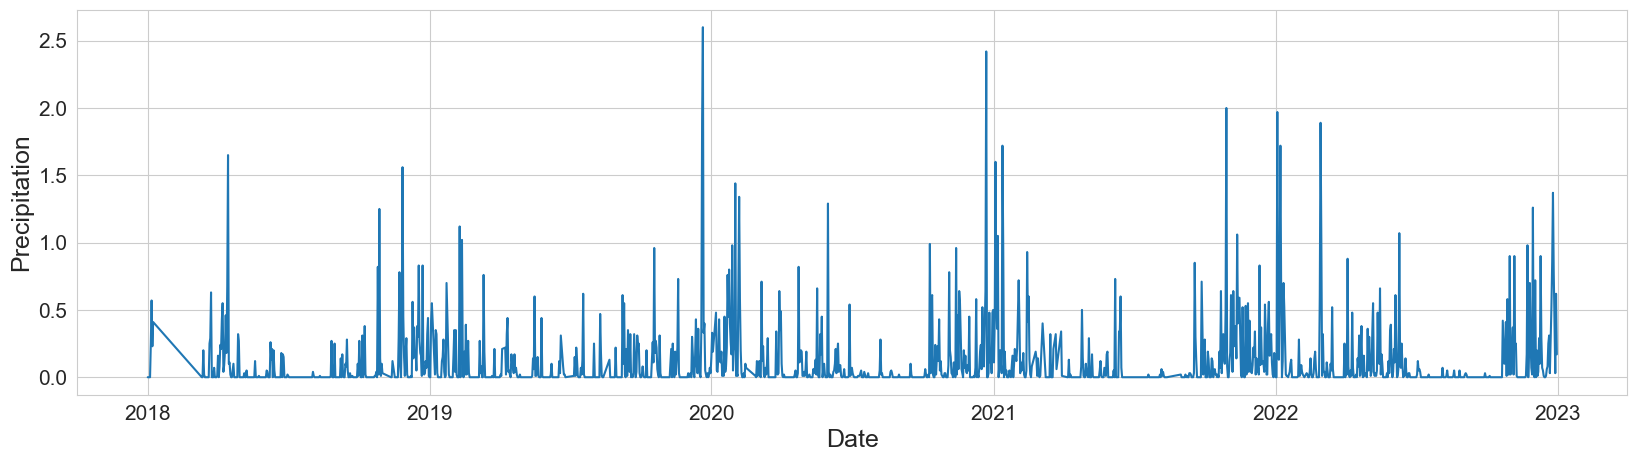

In [156]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation', fontsize = 18)

plt.tick_params(labelsize = 15)

plt.show()

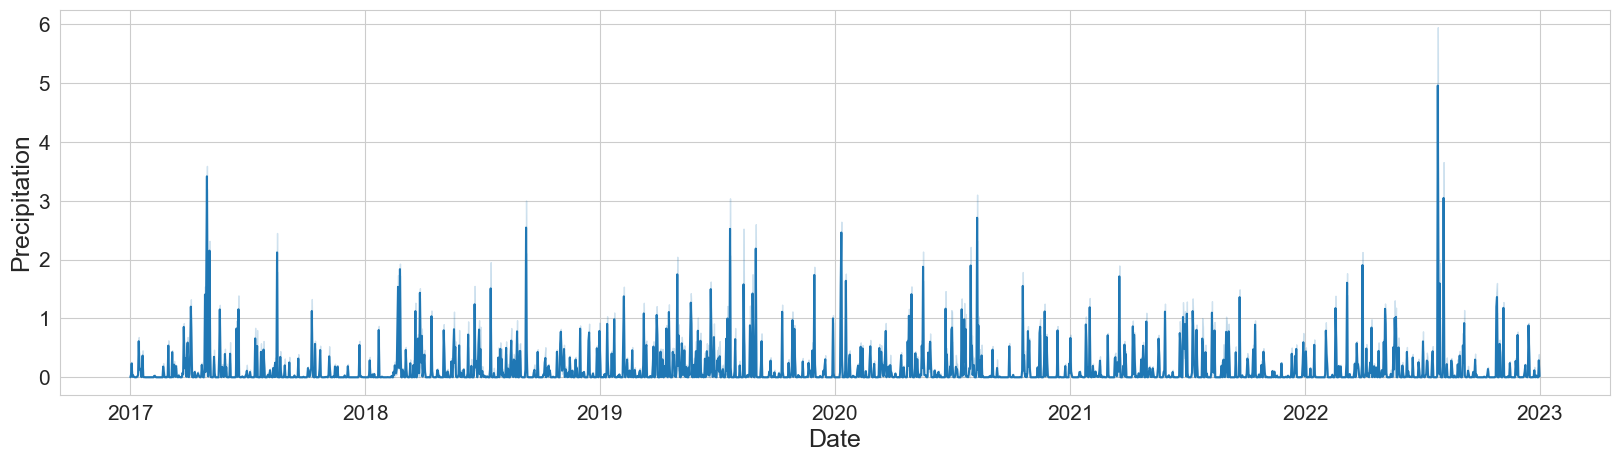

In [157]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation', fontsize = 18)

plt.tick_params(labelsize = 15)
plt.show()

Selecting relevant subsets of data

In [223]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [224]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


In [225]:
df_stlouis['NAME'].unique()

array(['ST. CHARLES 2.3 NE, MO US', 'MANCHESTER 1.4 SE, MO US',
       'FLORISSANT 1.3 E, MO US', 'MAC KENZIE 0.3 ESE, MO US',
       'BELLEVILLE 4.5 WNW, IL US', 'WEBSTER GROVES 1.6 NNE, MO US',
       'ARNOLD 0.5 E, MO US', 'MAPLEWOOD 1.3 SE CLOSED, MO US',
       'GLENDALE 0.4 S, MO US', 'MARYLAND HEIGHTS 1.2 ESE, MO US',
       'FLORISSANT 2.5 NE, MO US', 'KIRKWOOD 1.0 NNW, MO US',
       'GRANITE CITY 2.7 NE, IL US', 'OAKVILLE 2.5 NW, MO US',
       'GLENDALE 0.3 NE, MO US', 'ST. LOUIS 5.7 SW, MO US',
       'EDMUNDSON 0.7 NNW, MO US', 'BALLWIN 0.5 NNW, MO US',
       'BALLWIN 1.6 E, MO US', 'KIRKWOOD 1.6 S, MO US',
       'ST CHARLES ELM POINT, MO US', 'ST LOUIS SCIENCE CENTER, MO US',
       'ST CHARLES 7 SSW, MO US', 'FAIRMONT CITY 0.9 ENE, IL US',
       'CAHOKIA ST LOUIS DOWNTOWN AIRPORT, IL US',
       'GLENDALE 0.6 WSW, MO US', 'COLUMBIA 0.4 S, IL US',
       'CLAYTON 1.2 NW, MO US', 'FENTON 4.1 S, MO US',
       'ST. CHARLES 2.6 S, MO US', 'GRANITE CITY 1.4 ENE, IL US',
  

In [226]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [227]:
df_stlouis['STATION'].unique()

array(['USW00013994'], dtype=object)

In [228]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


Joining Seattle and Stlouis dataframes and keeping only DATE and PRCP columns

Using outer join to keep all dates present 

In [229]:
df = df_stlouis[['DATE','PRCP']].merge(df_seattle[['DATE','PRCP']], on = 'DATE', how = 'outer')

In [230]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Turning the dataset from wide format to tidy data using 'melt'

In [231]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')

In [232]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


Renaming city values to 'SEA and 'STL'

In [233]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'STL'

In [234]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [235]:
df.head()

,DATE,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [236]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


In [237]:
df = df.rename(columns = {'DATE' : 'date'})

In [238]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


Identifying and filling  missing values

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [240]:
df.notna().sum()

date             3652
city             3652
precipitation    3462
dtype: int64

In [241]:
df.isna().sum()

date               0
city               0
precipitation    190
dtype: int64

In [242]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

190

In [243]:
df.loc[df['city'] == 'STL', 'precipitation'].isna().sum()

0

There is no NaN values in st.louis for precipitation values,but are there any dates omitted?

Number of dates from 2018 to 2022
5 * 365 + 1 = 1826 days.

So, the St.louis data set not is missing any dates or precipitation values.

### Replacing missing values with the mean across years of values on that day.

Defining a column that labels each day by the day of the year: 1, 2,...,365.

In [244]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [245]:
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


In [246]:
mean_day_precipitation = df.loc[df['city'] == 'SEA', ['precipitation','day_of_year']].groupby('day_of_year').mean()

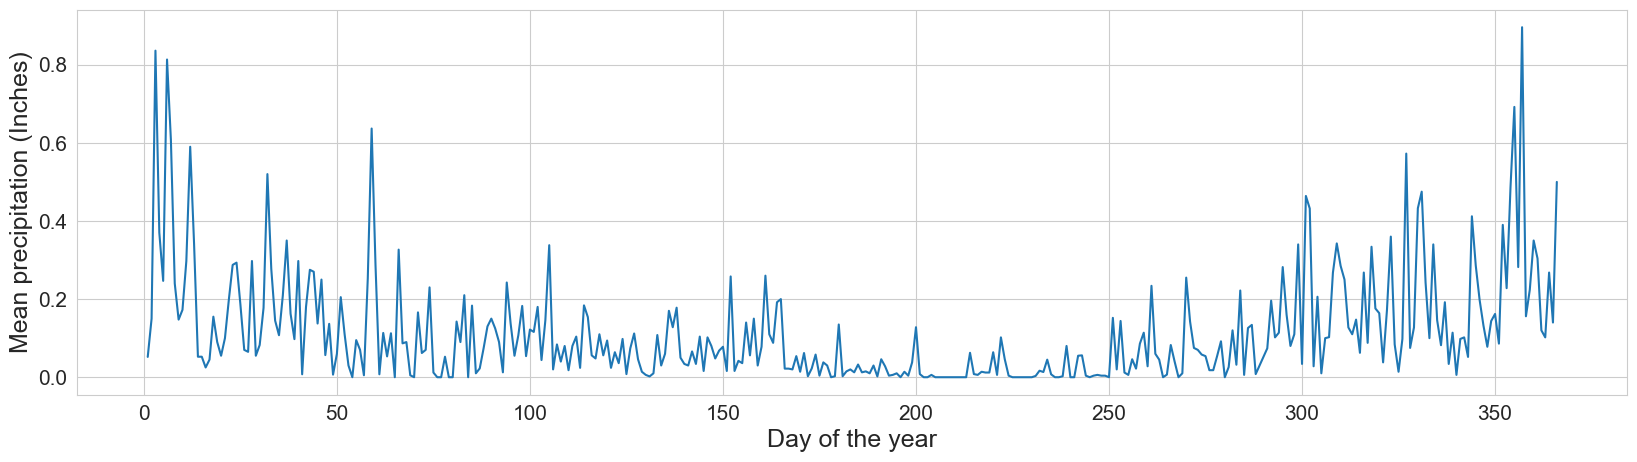

In [247]:
plt.figure(figsize = (20,5))

sns.lineplot(data = mean_day_precipitation, x = 'day_of_year', y = 'precipitation')

plt.xlabel('Day of the year', fontsize = 18)
plt.ylabel('Mean precipitation (Inches)', fontsize = 18)

plt.tick_params(labelsize = 15)

plt.show()

In [248]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.0,1
1,2018-01-02,STL,0.0,2
2,2018-01-03,STL,0.0,3
3,2018-01-04,STL,0.0,4
4,2018-01-05,STL,0.0,5


In [249]:
df['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [250]:
# Getting the index of the missing precipitation value

indices = np.where(df['precipitation'].isna()  == True)[0]

In [251]:
# Replacing the missing precipitation values with the corresponding meanon that day

for index in indices:
    df.loc[index,'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [252]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

### Export the clean .csv file

In [253]:
df.to_csv('clean_seattle_stlouis_weather.csv', encoding = 'utf-8-sig', index = False)

## Exploratory data analysis

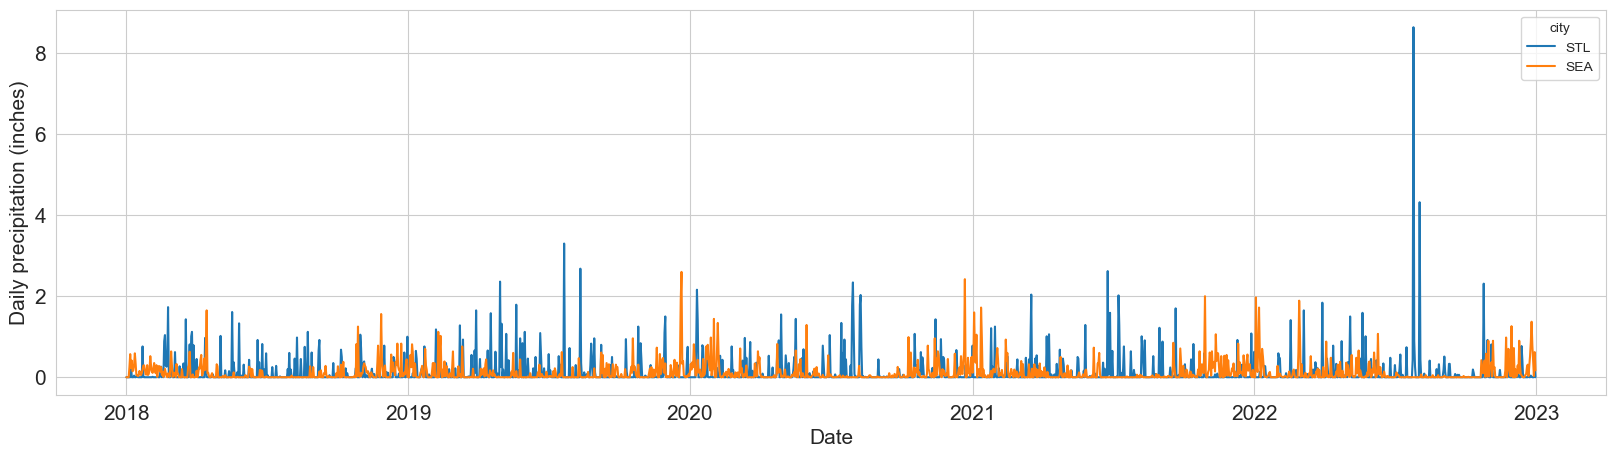

In [255]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, x = 'date', y = 'precipitation', hue = 'city')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
        
plt.tick_params(labelsize = 15)

plt.show()

Compute basic numerical summaries for precipitation in each city

Precipitation has values for both cities, so we have to compute summaries including cities.

In [256]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64

Compare mean precipitation values averaged over all days

In [257]:
df[['city','precipitation']].groupby('city').mean()

,precipitation
city,
SEA,0.113270
STL,0.130345


Showing the values as a bar graph

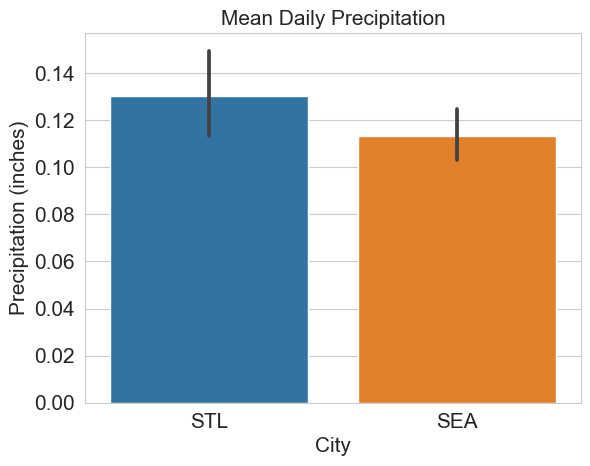

In [258]:
sns.barplot(data = df, x = 'city', y = 'precipitation')

plt.xlabel('City', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean Daily Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

What does the errorbar represent?

In [259]:
sns.barplot?           

### Precipitation by month

Add the column to the dataframe with the number of the month

In [260]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [261]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


In [262]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### Plot the distribution of precipitation amounts each month using boxplots

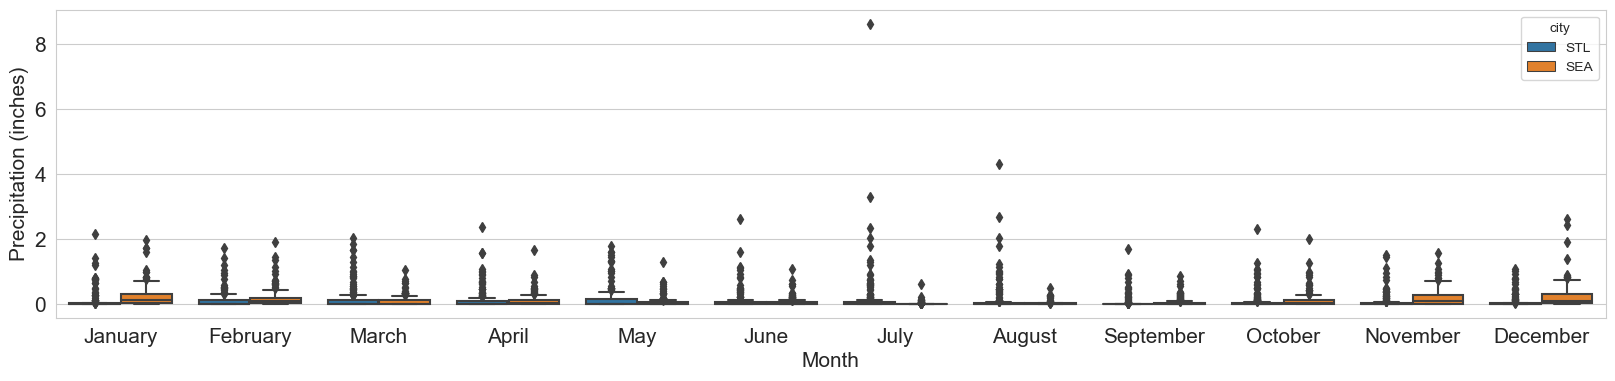

In [266]:
plt.figure(figsize = (20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

#Get month names and set as x-axis tick labels
import calendar
#Get month names
month_names = list(calendar.month_name[1:])  
#Set x axis ticks to month names
plt.xticks(ticks = range(12), labels = month_names)

plt.show()

Orient the plot horizantally

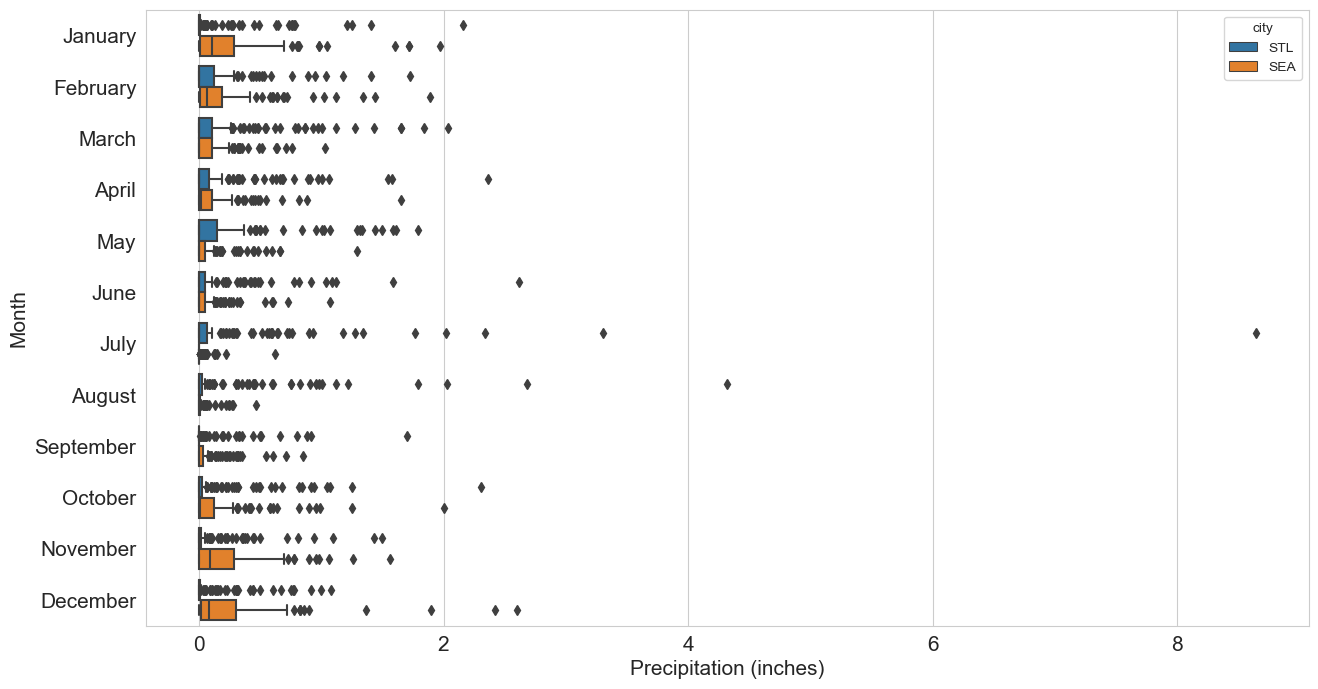

In [271]:
plt.figure(figsize = (15,8))

sns.boxplot(data = df, x = 'precipitation', y = 'month', hue = 'city', orient = 'h')

plt.ylabel('Month', fontsize = 15)
plt.xlabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

#Get month names
month_names = list(calendar.month_name[1:])  
#Set y axis ticks to month names
plt.yticks(ticks = range(12), labels = month_names)

plt.show()

Zoom in on the precipitation axis

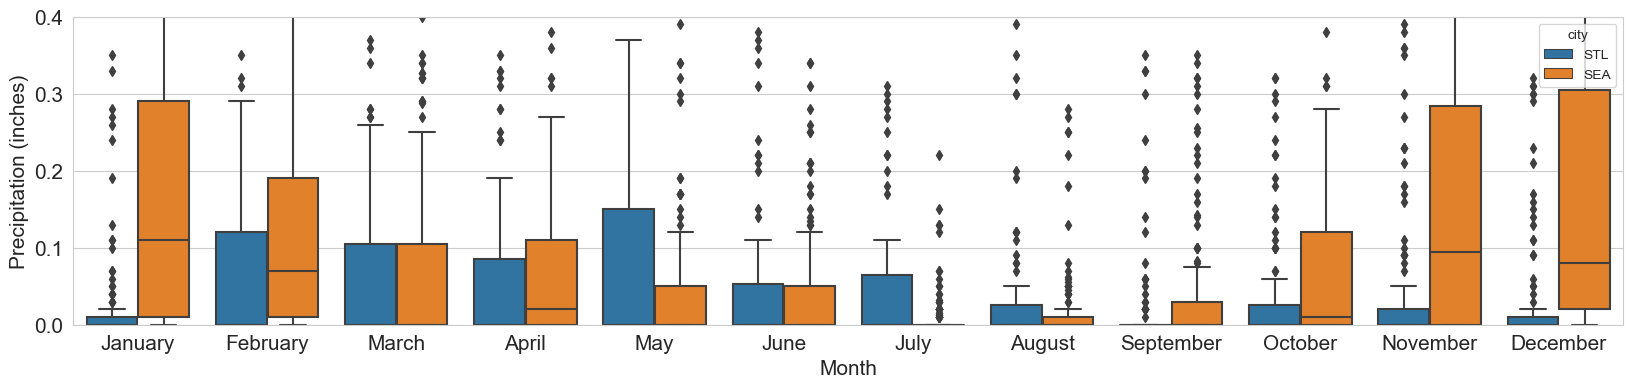

In [272]:
plt.figure(figsize = (20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

month_names = list(calendar.month_name[1:])  

plt.xticks(ticks = range(12), labels = month_names)

plt.ylim(0, 0.4)

plt.show()

Plot the mean precipitation each month

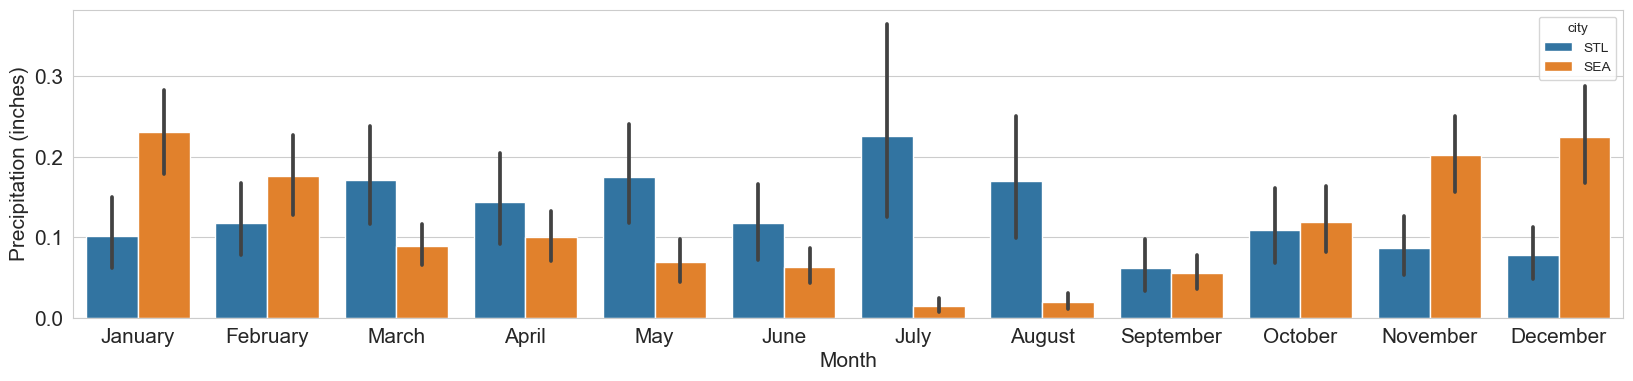

In [273]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)  

plt.xticks(ticks = range(12), labels = month_names)

plt.show()

Compute the mean precipitation each month

In [275]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903
STL  1           0.102065
     2           0.118298
     3           0.171355
     4           0.143733
     5           0.174839
     6           0.117200
     7           0.225419
     8           0.169871
     9           0.062333
     10          0.109677
     11          0.086267
     12          0.078387

Plot the proportion of days with any precipitation

Add a variable to the dataframe that indicates whether there was any precipitation

In [276]:
df['any_precipitation'] = df['precipitation'] > 0

In [277]:
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,STL,0.0,1,1,False
1,2018-01-02,STL,0.0,2,1,False
2,2018-01-03,STL,0.0,3,1,False
3,2018-01-04,STL,0.0,4,1,False
4,2018-01-05,STL,0.0,5,1,False


Plot the proportion of days with any precipitation over the 5 years

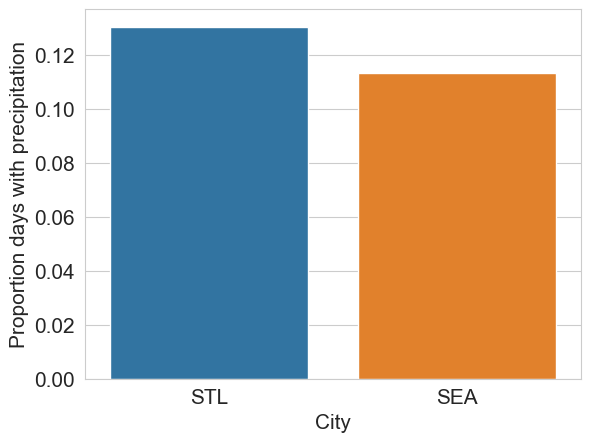

In [278]:
sns.barplot(data = df, x = 'city', y = 'precipitation', errorbar = None)

plt.xlabel('City', fontsize = 15)
plt.ylabel('Proportion days with precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

Plot the proportion of days with precipitation each month

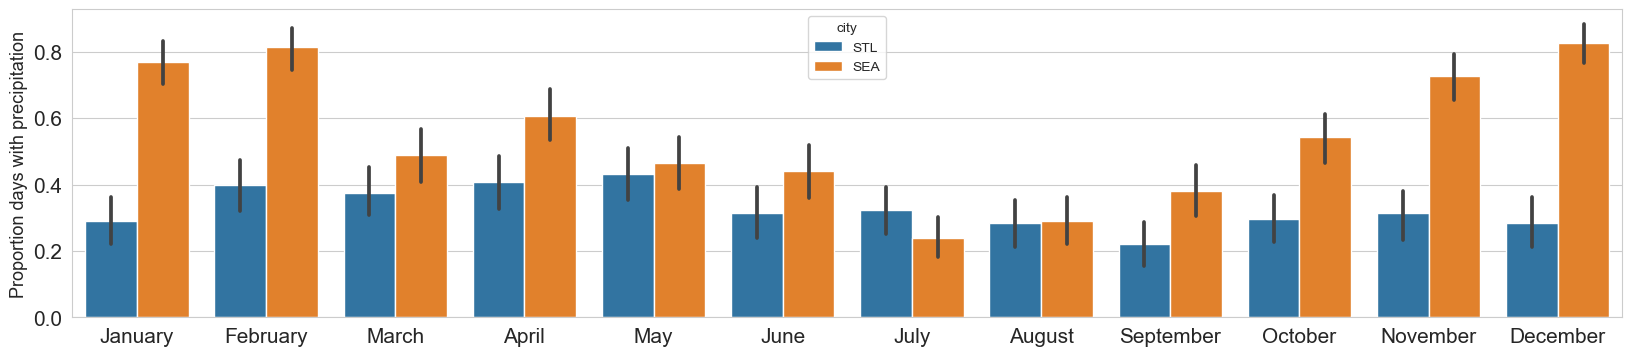

In [279]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 13)
plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize = 15)

plt.show()

### Analyses

perform a statistical test for differences in the mean precipitation each month between the cities

$$
H_0: \mu_{\text{Seattle, January}} = \mu_{\text{St. Louis, January}} \\
H_a: \mu_{\text{Seattle, January}} \ne \mu_{\text{St. Louis, January}}
$$

$$
H_0: \mu_{\text{Seattle, February}} = \mu_{\text{St. Louis, February}} \\
H_a: \mu_{\text{Seattle, February}} \ne \mu_{\text{St. Louis, February}}
$$

...

$$
H_0: \mu_{\text{Seattle, December}} = \mu_{\text{St. Louis, December}} \\
H_a: \mu_{\text{Seattle, December}} \ne \mu_{\text{St. Louis, December}}
$$

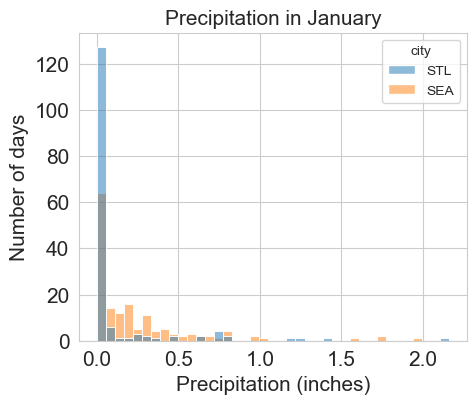

In [280]:
plt.figure(figsize = (5,4))

sns.histplot(data = df.loc[df['month'] == 1], x = 'precipitation', hue = 'city')

plt.xlabel('Precipitation (inches)', fontsize = 15)
plt.ylabel('Number of days', fontsize = 15)
plt.title('Precipitation in January', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

In [282]:
from scipy import stats

significance_level = 0.05
significantly_different = np.zeros(12)

#perform t-test for each month
for month in range(1,13):
    #Get precipitation data for Seattle and St louis for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == 'month'), 'precipitation']
    stl_data = df.loc[(df['city'] == 'STL') & (df['month'] == 'month'), 'precipitation']
    
    t_statistic, p_value = stats.ttest_ind(sea_data, stl_data, equal_var = False)
    
    if p_value < significance_level:
        significantly_different[month - 1] = 1
        
    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic:.2f}")
    print(f" p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 2:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 3:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 4:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 5:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 6:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 7:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 8:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 9:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 10:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 11:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 12:
 t-statistic = nan
 p-value t test = nan
--------------------


Plot the mean precipitation each month with a star for significant differences

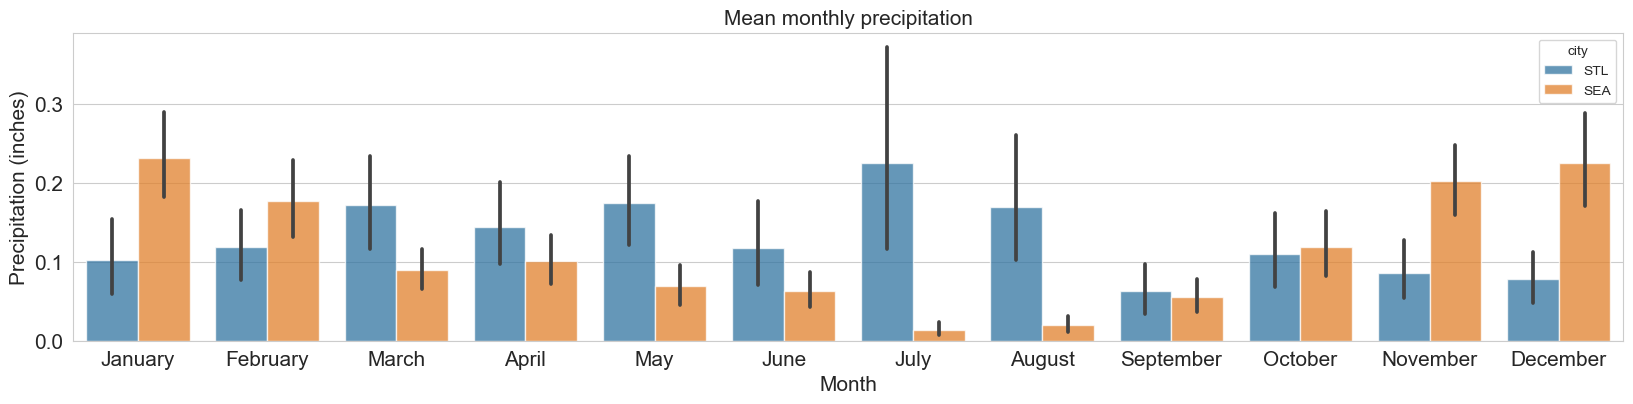

In [285]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean monthly precipitation', fontsize = 15)

plt.tick_params(labelsize =15)

plt.xticks(ticks = range(12), labels = month_names)

#Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:
        #Add a star
        plt.text(month, 0.3, '*', ha = 'center', fontsize = 25)
        
plt.show()

perform a statistical test for differences in the proportion of days with any precipitation each month between the cities

$$
H_0 : p_{\text{Seattle, January}} = p_{\text{St. Louis, January}} \\
H_a : p_{\text{Seattle, January}} \neq p_{\text{St. Louis, January}}
$$

$$
H_0 : p_{\text{Seattle, February}} = p_{\text{St. Louis, February}} \\
H_a : p_{\text{Seattle, February}} \neq p_{\text{St. Louis, February}}
$$

...

$$
H_0 : p_{\text{Seattle, December}} = p_{\text{St. Louis, December}} \\
H_a : p_{\text{Seattle, December}} \neq p_{\text{St. Louis, December}}
$$

In [286]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

#Perform t-test for each month
for month in range(1,13):
    
    #Create a contingency table for Seattle and St louis for the current month
    contingency_table = pd.crosstab(df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation'])
    
    #Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]
    
    #Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis = 1)
    
    #Hypothesis test
    zstat, p_value = proportions_ztest(count = days_with_precipitation, nobs = total_counts, alternative = 'two-sided')
    
    if p_value < significance_level:
        significantly_different_proportion[month - 1] = 1
        
print(f"Month {month}:")
print(f" z-statistic = {zstat:.2f}")
print(f" p-value = {p_value:.3f}")
print("-" * 20)
        

Month 12:
 z-statistic = 9.60
 p-value = 0.000
--------------------


In [287]:
contingency_table = pd.crosstab(df.loc[df['month'] == 1, 'city'], df.loc[df['month'] == 1, 'any_precipitation'])

contingency_table

any_precipitation,False,True
city,,
SEA,36,119
STL,110,45


Plot the proportion of days with any precipitation each month with a star for significant differences

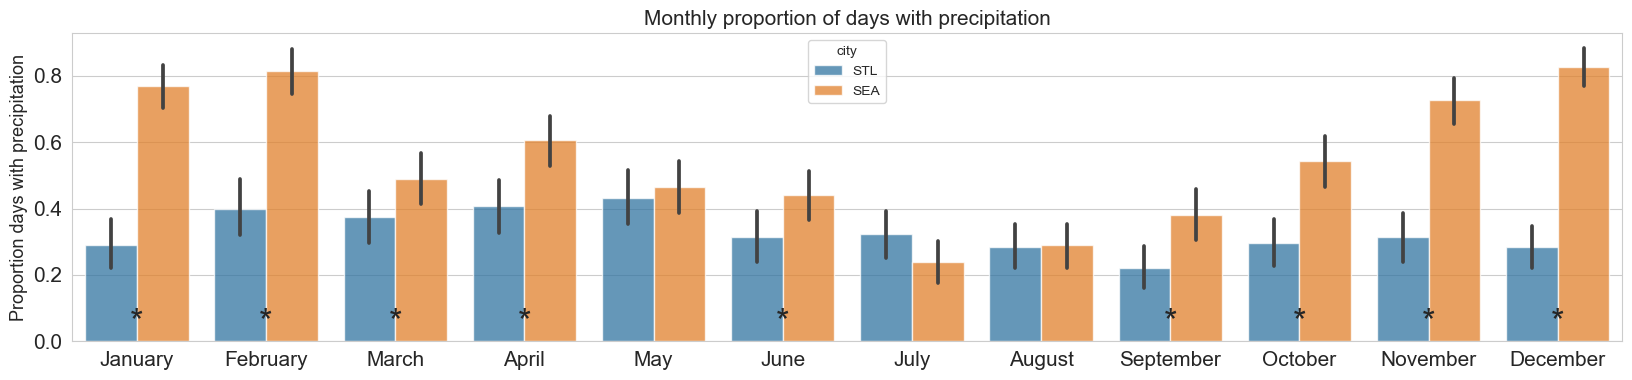

In [289]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 13)
plt.title("Monthly proportion of days with precipitation", fontsize = 15)

plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize = 15)

#Add star for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:
        
        #Add a star
        plt.text(month, 0.025,'*', ha = 'center', fontsize = 25)
        
plt.show()

In [4]:
#end#